## Skill-Assessment Exercise 10.1

### PART A
_Find analytical expressions for the magnitude and phase responses of_

$$
G(s) = \frac{1}{(s+2)(s+4)}
$$

Substitute $s = \omega i$

$$
G(\omega i) = \frac{1}{(\omega i+2)(\omega i+4)} = \frac{1}{8-\omega ^{2} + 6\omega i}
$$

The denominator is a complex number in Cartesian form. Convert to polar form. Recall that the polar form of a complex number is $me^{i\theta}$ where magnitude $m = \sqrt{re^{2} + im^{2}}$ and angle $\theta = tan^{-1}\frac{re}{im}$. Thus the complex number in the denominator in polar form is

$$
\sqrt{(8-\omega ^{2})^{2} + (6\omega)^{2}} e^{itan^{-1}\frac{6\omega}{8-\omega ^{2}}}
$$

Writing the overall form of $G(\omega i)$ including the numerator and the denominator

$$
\frac{e^{-itan^{-1}\frac{6\omega}{8-\omega ^{2}}}}{\sqrt{(8-\omega ^{2})^{2} + 6\omega^{2}}}
$$

Since the above is in polar form, the magnitude is simply

$$
M(\omega) = \frac{1}{\sqrt{(8-\omega ^{2})^{2} + (6\omega)^{2}}}
$$

The angle or phase is 

$$
\phi (\omega) = -tan^{-1}\frac{6\omega}{8-\omega ^{2}}
$$

I'm not sure about the inequalities given for $\phi (\omega)$ in the book's answer.



### PART B
_Make plots of the log-magnitude and the phase, using log-frequency in rad/s as the ordinate._

Two methods are shown below: manual using our derived analytical expressions and using a Bode plot function for the original system. For some reason, the phase plot of the manual method doesn't look right and needs to be fixed. The expressions for the inequalities probably need to be used, as well as converting radians in y-axis to degrees.

In [1]:
#  Import libraries
import numpy as np
import matplotlib.pyplot as plt
import control as ct
from scipy import signal
# Make interactable plots
%matplotlib ipympl

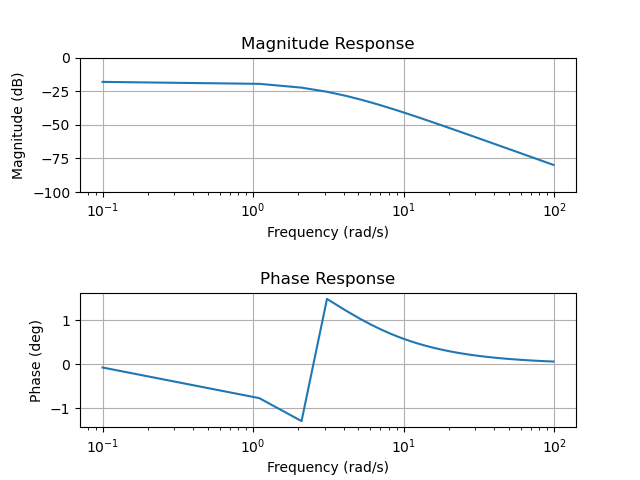

In [2]:
#  MANUAL METHOD
w = np.arange(0.1,100.1,1)           # Create vector from 0.1 to 100.1 with spacing 1
m = 1/np.sqrt((8-w**2)**2+(6*w)**2)  # Compute magnitude response
m_db = 20*np.log10(m)                # Convert magnitude to dB
phi = -np.arctan((6*w)/(8-w**2))     # Compute phase response

fig = plt.figure(1)                  # Create figure 1
fig.subplots_adjust(hspace = 0.75)   # Add spacing between subplots

# Plot magnitude
ax1 = fig.add_subplot(211)           # 211 means 2-by-1 grid, select plot 1
ax1.semilogx(w,m_db)                 # Plot frequency in log scale
ax1.set_ylim(-100,0)                 # Set y-axis limits
ax1.set_xlabel('Frequency (rad/s)')
ax1.set_ylabel('Magnitude (dB)')
ax1.set_title('Magnitude Response')
ax1.grid(True)

# Plot phase
ax1 = fig.add_subplot(212)           # 211 means 2-by-1 grid, select plot 2
ax1.semilogx(w,phi)                  # Plot frequency in log scale
# ax1.set_ylim(-100,0)               # Set y-axis limits
ax1.set_xlabel('Frequency (rad/s)')
ax1.set_ylabel('Phase (deg)')
ax1.set_title('Phase Response')
ax1.grid(True)

# Clean up workspace
del w, m, m_db, phi, fig, ax1

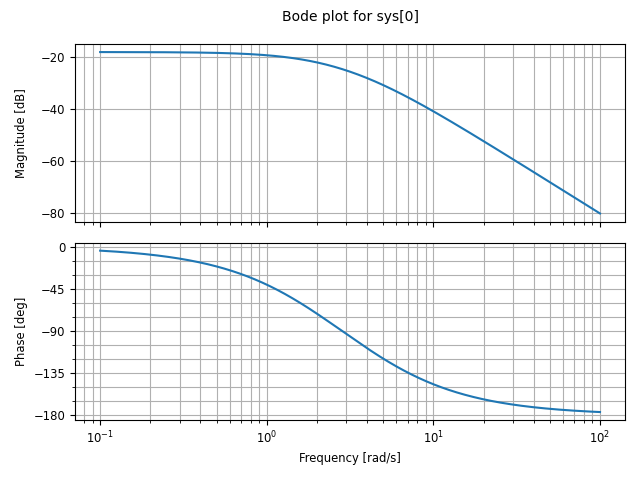

In [3]:
# BODE PLOT FUNCTION METHOD
numg = [1]
deng = np.poly([-2,-4])
G = ct.tf(numg, deng)

fig = plt.figure(2)
# ax1 = fig.add_subplot(111)
ct.bode(G, dB=True)

# Clean up workspace
del numg, deng, G, fig

### PART C
_Make a polar plot of the frequency response._

Cheating by using the Nichol's chart function to generate the polar frequency response.

Possible to make the dotted "mirror" image go away?

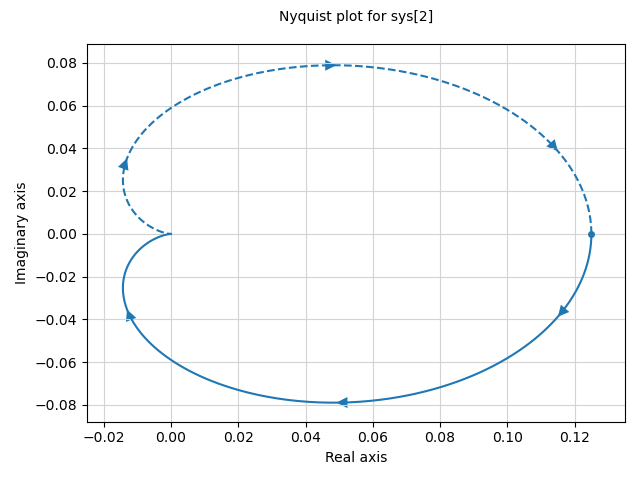

In [4]:
numg = [1]
deng = np.poly([-2,-4])
G = ct.tf(numg, deng)

fig = plt.figure(3)
ax1 = fig.add_subplot(111)
ax1.set_xlim(-0.025, 0.135) # Set x axis limits
ct.nyquist_plot(G)

# Clean up workspace
del numg, deng, G, fig, ax1